## Отчет по лабораторной работе C1207

Для сэмлирования написал скрипт на Python. Функции в качестве параметра принимают принимают поток (список, по которому я прохожу один раз) и размер сэмпла:
1. generate_equiprobable_sample - выбирает равновероятный сэмпл вытеснением ранее появившихся элементов с некоторой вероятностью
+ generate_weighted_sample - выбирает взвешенный сэмпл, по алгоритму рассмотренному на паре

In [16]:
import random
import heapq


def generate_equiprobable_sample(stream, k):

    sample = list()

    el_num = 0
    for el in stream:
        el_num += 1
        if len(sample) < k:
            sample.append(el)
        else:
            pi = k / (1.0 * (el_num + 1))
            if random.random() < pi:
                sample[random.randint(0, k - 1)] = el

    return sample


def generate_weighted_sample(weighted_stream, k):

    heap = list()

    for el in weighted_stream:

        ri = pow(random.random(), 1.0 / el[1])
        heapq.heappush(heap, (ri, el[0]))

        if len(heap) > k:
            heapq.heappop(heap)

    return [t[1] for t in heap]

Для тестирования зафиксировал размер потока равным 10000, размер сэмпла равным 100, кол-во выборов сэмпла для каждого теста равно 1000.

Кроме весов wi = i и wi = i^2, рассмотрел wi = 1, чтобы сравнить с первым алгоритмом.

In [17]:
N = 10000
K = 100

iters = 1000

samples_eq = list()
for i in xrange(iters):
    stream = list(xrange(1, N + 1))
    random.shuffle(stream)
    samples_eq.extend(generate_equiprobable_sample(stream, K))

samples_w = list()
for i in xrange(iters):
    weighted_stream = [(i, 1) for i in xrange(1, N + 1)]
    random.shuffle(weighted_stream)
    samples_w.extend(generate_weighted_sample(weighted_stream, K))

samples_wi = list()
for i in xrange(iters):
    weighted_stream = [(i, i) for i in xrange(1, N + 1)]
    random.shuffle(weighted_stream)
    samples_wi.extend(generate_weighted_sample(weighted_stream, K))

samples_wii = list()
for i in xrange(iters):
    weighted_stream = [(i, i * i) for i in xrange(1, N + 1)]
    random.shuffle(weighted_stream)
    samples_wii.extend(generate_weighted_sample(weighted_stream, K))


In [18]:
results = [samples_eq, samples_w, samples_wi, samples_wii]

Ниже приведены полученные гистограммы.

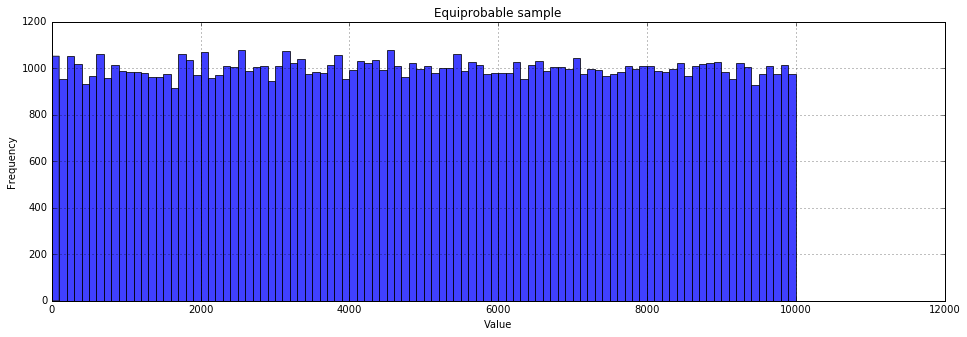

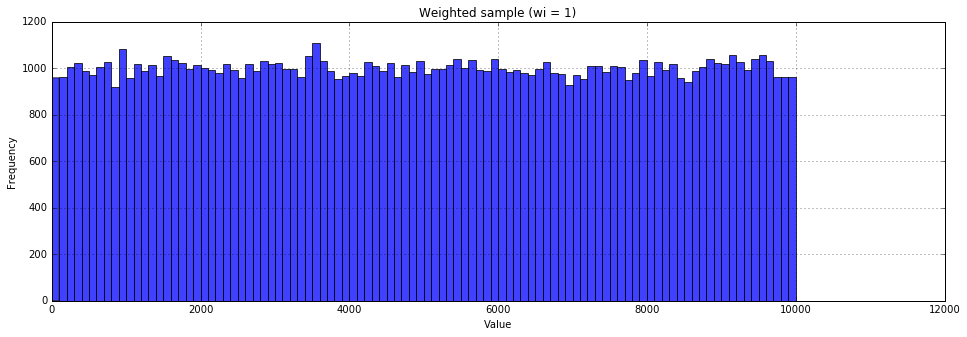

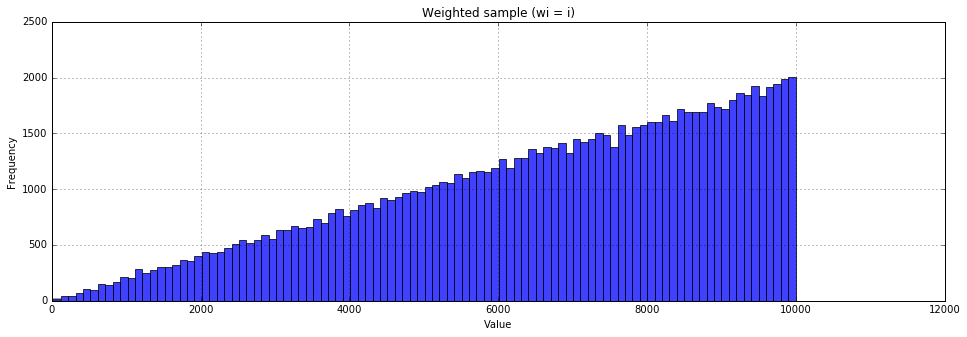

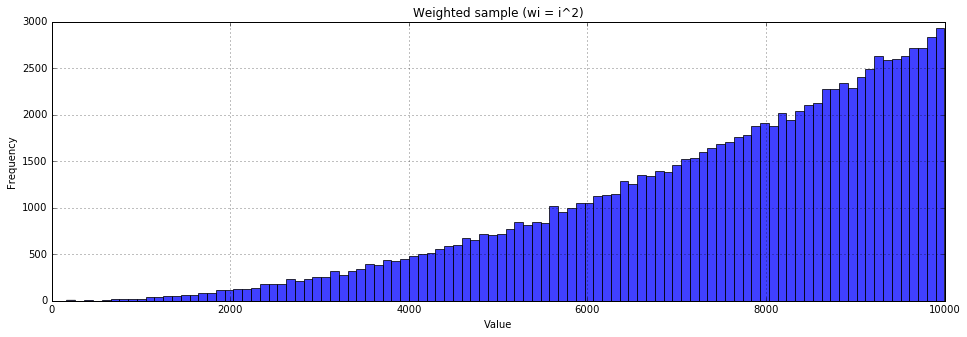

In [19]:
%matplotlib inline
import matplotlib.pyplot as pyplot

def drawhistogram(title, result):
    fig = pyplot.figure(figsize=(16 ,5), dpi=90)
    
    pyplot.title(title)
    pyplot.hist(result, bins=100, alpha=0.75)
    pyplot.xlabel("Value")
    pyplot.ylabel("Frequency")

    pyplot.grid(True)
    
    pyplot.show()

names = ["Equiprobable sample", "Weighted sample (wi = 1)", "Weighted sample (wi = i)", "Weighted sample (wi = i^2)"]
for i in xrange(len(results)):
    drawhistogram("{}".format(names[i]), results[i])

### Выводы:
* видно, что оба алгоритма работают одинаково хорошо при генерации равновероятного сэмпла;
* на гистограммах соответствующих сэмплированию с ненулевыми весами видны соответственно линейная и квадратичная зависиомсти, что подтверждает корректность работы алгоритма.